# Real estate price

In [110]:
import pandas as pd
df = pd.read_csv("Real estate.csv")

In [111]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [112]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [113]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [115]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


# 1. Split the Dataset

In [121]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
Y = df['Y house price of unit area']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Display the shape of the train and test sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(289, 4) (125, 4) (289,) (125,)


# 2. Check Correlation

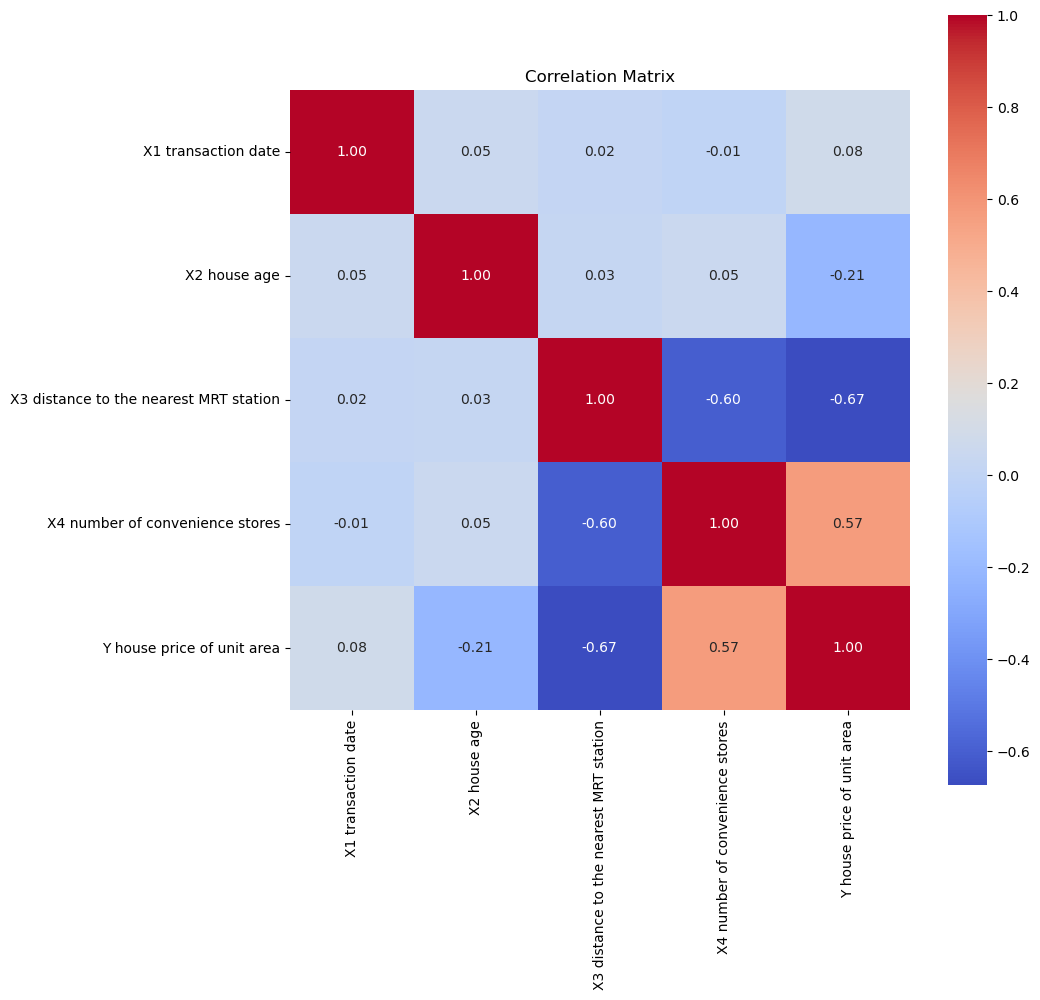

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

# 3. Apply Regression Models

- a. Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, Y_train)

# Predict the target values on the test data
Y_pred_linear = linear_reg.predict(X_test)

- b. Polynomial Regression

In [128]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features to include polynomial terms (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the Linear Regression model on the polynomial features
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, Y_train)

# Predict the target values on the transformed test data
Y_pred_poly = linear_reg_poly.predict(X_test_poly)

# 4. Evaluate Model Performance

- a. Linear Regression

In [131]:
# Calculate Mean Squared Error (MSE) and R-squared (R²) for the Linear Regression model
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
r2_linear = r2_score(Y_test, Y_pred_linear)

print(" For Linear Regression - MSE is", mse_linear, "and R² is", r2_linear)

 For Linear Regression - MSE is 72.84834417663679 and R² is 0.5643696003958165


- b. Polynomial Regression

In [133]:
# Calculate MSE and R² for the Polynomial Regression model
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
r2_poly = r2_score(Y_test, Y_pred_poly)

print("For Polynomial Regression - MSE is", mse_poly, "and R² is", r2_poly)

For Polynomial Regression - MSE is 58.78858532336878 and R² is 0.64844643751289


- Compare the results to determine which model performs better

In [135]:
# Determine which model has better performance based on MSE and R²
if mse_linear < mse_poly:
    print("Linear Regression has better performance as it has lower MSE.")
else:
    print("Polynomial Regression has better performance as it has lower MSE.")

if r2_linear > r2_poly:
    print("Linear Regression has better performance as it has higher R².")
else:
    print("Polynomial Regression has better performance as it has higher R².")

# Determine better model based on both metrics
if mse_linear < mse_poly and r2_linear > r2_poly:
    print("Therefore, Linear Regression model performs better.")
elif mse_linear > mse_poly and r2_linear < r2_poly:
    print("Therefore, Polynomial Regression model performs better.")
else:
    print("Both models have comparable performance, but one model outperforms the other model in some aspects.")

Polynomial Regression has better performance as it has lower MSE.
Polynomial Regression has better performance as it has higher R².
Therefore, Polynomial Regression model performs better.


# 5. Visualize Results

- Plot actual vs. predicted values for both Linear and Polynomial Regression.

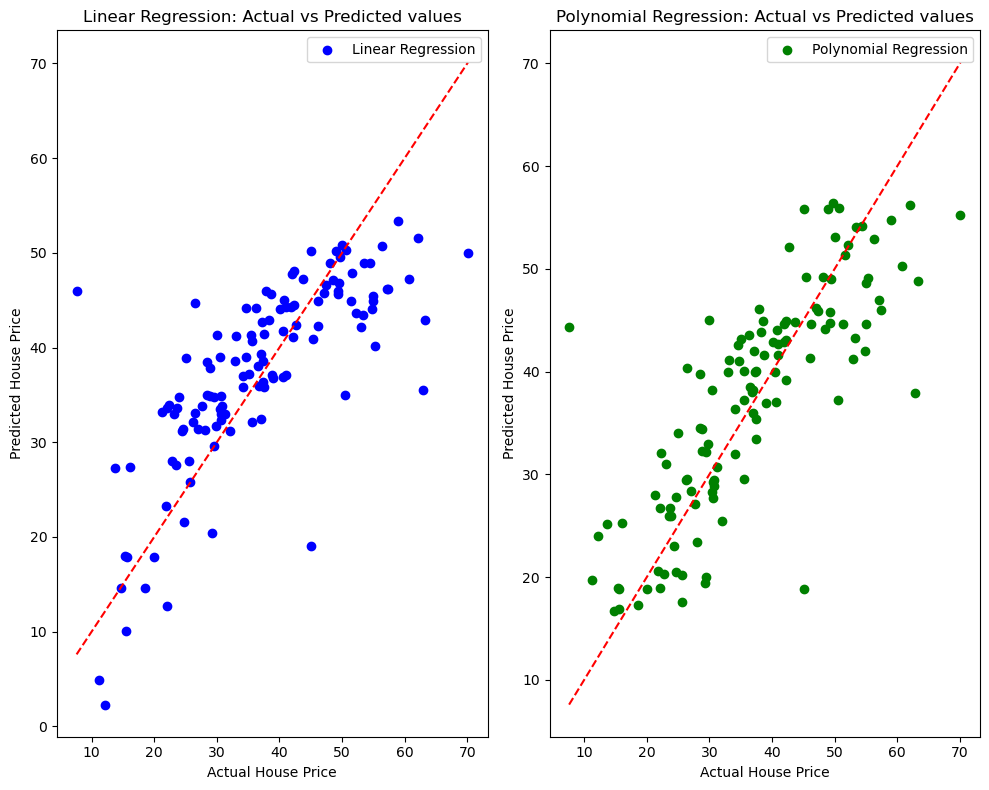

In [138]:
# Plotting actual vs predicted values for both Linear and Polynomial Regression
plt.figure(figsize=(10, 8))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred_linear, color='blue', label='Linear Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted values')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()

# Plot for Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_poly, color='green', label='Polynomial Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Polynomial Regression: Actual vs Predicted values')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

- For Polynomial Regression, visualize the curve fitting to see how well it models the data.

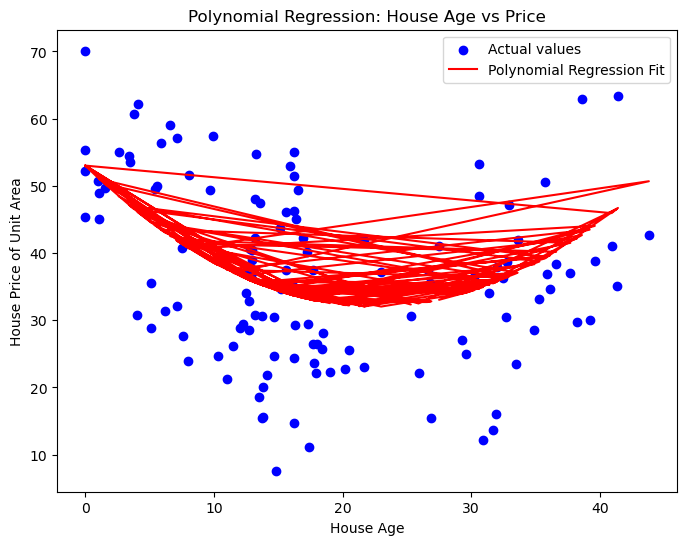

In [140]:
# Focus on a 2D plot of one feature vs. the target variable
X_train_age = X_train['X2 house age'].values.reshape(-1, 1)
X_test_age = X_test['X2 house age'].values.reshape(-1, 1)

# Apply polynomial transformation to the chosen feature (degree=2)
X_train_age_poly = poly.fit_transform(X_train_age)
X_test_age_poly = poly.transform(X_test_age)

# Train the model again on the polynomial features of the age variable
linear_reg_poly_age = LinearRegression()
linear_reg_poly_age.fit(X_train_age_poly, Y_train)

# Predict using the transformed features
Y_pred_poly_age = linear_reg_poly_age.predict(X_test_age_poly)

# Plotting the curve fitting for the feature 'X2 house age' vs. target 'Y'
plt.figure(figsize=(8, 6))
plt.scatter(X_test_age, Y_test, color='blue', label='Actual values')
plt.plot(X_test_age, Y_pred_poly_age, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression: House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.legend()
plt.show()